In [23]:
import matplotlib.pyplot as plt
import numpy as np
import signac

In [24]:
project = signac.get_project("/Users/stephaniemccallum/Desktop/cmelab/transfer/mupt-examples")

/var/folders/jr/8265_v612wxg_7hntt0sy_780000gn/T/ipykernel_33062/164873420.py:11: MatplotlibDeprecationWarning: Passing label as a length 8 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(N,time,label=("A: ",job.sp.A," gamma: ",job.sp.gamma," k: ",job.sp.k," r_cut: ",job.sp.r_cut))


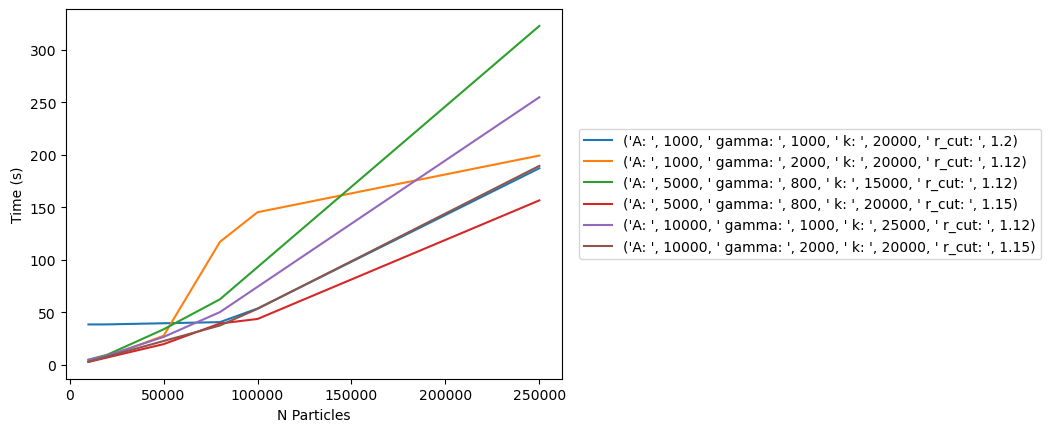

In [26]:
group_params = ["sp.A","sp.gamma","sp.k","sp.r_cut"]
for chains,jobs in project.find_jobs({"doc.time": {"$exists": True}}).groupby(["sp.A","sp.gamma","sp.k","sp.r_cut"]):
    sorted_jobs = sorted(jobs, key=lambda job: job.sp.num_pol)
    time = []
    N = []
    for job in sorted_jobs:
        if job.doc.time > 0:
            time.append(job.doc.time)
            N.append(job.sp.num_mon*job.sp.num_pol)
    if len(N) > 4:
        plt.plot(N,time,label=("A: ",job.sp.A," gamma: ",job.sp.gamma," k: ",job.sp.k," r_cut: ",job.sp.r_cut))
        plt.xlabel("N Particles")
        plt.ylabel("Time (s)")
        plt.legend(loc='center left',bbox_to_anchor=(1.02, 0.5))
plt.savefig("dpd_screened.jpg",bbox_inches="tight")

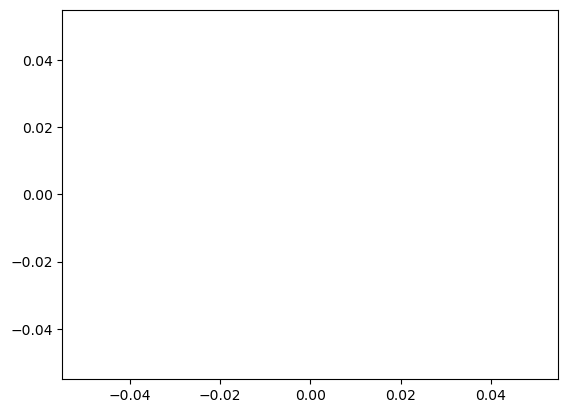

In [15]:
plt.plot(N,time)